In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# !rm -r pytorch-unet-master
!cp -r drive/My\ Drive/pytorch-unet-master/* . 
# !cp -r drive/My\ Drive/neural_9o_e3amhno/* .

In [ ]:
!sudo add-apt-repository ppa:ubuntugis/ppa
!sudo apt-get update
!sudo apt-get install gdal-bin libgdal-dev
!pip install -U pip
!pip install rasterio

 Official stable UbuntuGIS packages.


 More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 k

In [ ]:
# !cp -r drive/My\ Drive/joblib/joblib320.tar.gz . 
# !tar -xvzf joblib320.tar.gz 
# !ls
import pickle 
from joblib import dump, load
import joblib

# X=np.array(load('X_320_80.joblib'),dtype=np.uint8)
# Y=np.array(load('Y_32_8.joblib'),dtype=np.float32)

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation



In [ ]:
from __future__ import print_function
 
import cv2 # Import the OpenCV library
import numpy as np # Import Numpy library
import matplotlib.pyplot as plt # Import matplotlib functionality
import sys # Enables the passing of arguments

def calculate_cdf(histogram):
    """
    This method calculates the cumulative distribution function
    :param array histogram: The values of the histogram
    :return: normalized_cdf: The normalized cumulative distribution function
    :rtype: array
    """
    # Get the cumulative sum of the elements
    cdf = histogram.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf
 
def calculate_lookup(src_cdf, ref_cdf):
    """
    This method creates the lookup table
    :param array src_cdf: The cdf for the source image
    :param array ref_cdf: The cdf for the reference image
    :return: lookup_table: The lookup table
    :rtype: array
    """
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table
 
def match_histograms(src_image, ref_image):
    """
    This method matches the source image histogram to the
    reference signal
    :param image src_image: The original source image
    :param image  ref_image: The reference image
    :return: image_after_matching
    :rtype: image (array)
    """
    # Split the images into the different color channels
    # b means blue, g means green and r means red
    src_b, src_g, src_r = cv2.split(src_image)
    ref_b, ref_g, ref_r = cv2.split(ref_image)
 
    # Compute the b, g, and r histograms separately
    # The flatten() Numpy method returns a copy of the array c
    # collapsed into one dimension.
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    # Compute the normalized cdf for the source and reference image
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    # Make a separate lookup table for each color
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # Use the lookup function to transform the colors of the original
    # source image
    blue_after_transform = cv2.LUT(src_b, blue_lookup_table)
    green_after_transform = cv2.LUT(src_g, green_lookup_table)
    red_after_transform = cv2.LUT(src_r, red_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([
        blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching
 

(1, 5515, 5077)
(1, 5515, 5077)
(1, 5515, 5077)
(1, 5515, 5077)
(1, 3692, 4155)
(1, 3692, 4155)
(1, 3692, 4155)
(1, 3692, 4155)


dim= (1, 5515, 5077)
corine dim= (5514, 5076)


dim= (1, 3692, 4155)
corine dim= (3691, 4154)


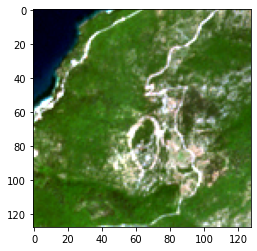

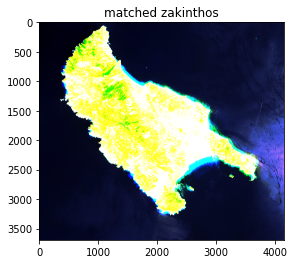

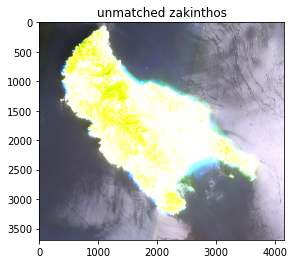

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rasterio as rio
from rasterio.plot import show

    
# from PIL import Image
# import numpy as np

# im = Image.open('/home/bill/Λήψεις/Kef/Corine_kef.tif')

# # im = Image.open('/home/bill/kefalonia_test.tif')
import cv2
import numpy as np
# imarray = cv2.resize(np.array(im), dsize=(5145,5483), interpolation=cv2.INTER_NEAREST )
# # 11  56  57  65  67  68  76  77 111 112 121 123 124 131 142 155 211 221
# # 223 231 242 243



# im=np.array(im)
# print(np.unique(im))
# bl = imarray[:,:]==243
# bl=bl.reshape(imarray.shape)
# print(bl.shape)
# # imarray=bl
# plt.plot(imarray)
# from matplotlib import pyplot as plt
# plt.imshow(imarray)
# plt.show()
# print(imarray.shape)
# print(imarray)
# print(np.unique(imarray))
# print(len(np.unique(imarray)))
# # _ = plt.hist(imarray, bins='auto')  # arguments are passed to np.histogram
# # plt.title("Histogram with 'auto' bins")

# # plt.show()

import numpy as np
from osgeo import gdal
# ds = gdal.Open("/home/bill/Λήψεις/Kef/Kef_raster.tif")
# myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
# plt.imshow(myarray[3000:3512,3000:3512])
# plt.title('X.Band1: Infrared')
# plt.show()
# plt.imshow(imarray[3000:3512,3000:3512])
# plt.title('y: clc')
# plt.show()


import matplotlib.pyplot as plt
from skimage import data
from skimage import exposure
# from skimage.exposure import match_histograms


# fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
#                                     sharex=True, sharey=True)
# for aa in (ax1, ax2, ax3):
#     aa.set_axis_off()

# ax1.imshow(image)
# ax1.set_title('Source')
# ax2.imshow(reference)
# ax2.set_title('Reference')
# ax3.imshow(matched)
# ax3.set_title('Matched')

# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt
%matplotlib inline

import rasterio as rio
from rasterio.plot import show
from matplotlib.pyplot import imshow
# dim=0
with rio.open(r'Kefalonia/Kef_BGB_cliped.tif') as src_plot:
    print(src_plot.read([1]).shape)
    print(src_plot.read([2]).shape)
    print(src_plot.read([3]).shape)
    print(src_plot.read([4]).shape)

    dim1=src_plot.read([1]).shape[1]
    dim2=src_plot.read([1]).shape[2]
    b1=np.reshape(src_plot.read([1]),(dim1,dim2,1))
    
    dim1=src_plot.read([2]).shape[1]
    dim2=src_plot.read([2]).shape[2]
    b2=np.reshape(src_plot.read([2]),(dim1,dim2,1))

    dim1=src_plot.read([3]).shape[1]
    dim2=src_plot.read([3]).shape[2]
    b3=np.reshape(src_plot.read([3]),(dim1,dim2,1))

    reference=np.concatenate((b1,b2,b3),axis=2)
    plt.figure()
    imshow(reference[3000:3128,3000:3128])

with rio.open(r'Zakinthos/Zak_rgb_cliped.tif') as src_plot:
    print(src_plot.read([1]).shape)
    print(src_plot.read([2]).shape)
    print(src_plot.read([3]).shape)
    print(src_plot.read([4]).shape)
    dim1=src_plot.read([1]).shape[1]
    dim2=src_plot.read([1]).shape[2]
    b1=np.reshape(src_plot.read([1]),(dim1,dim2,1))
    
    dim1=src_plot.read([2]).shape[1]
    dim2=src_plot.read([2]).shape[2]
    b2=np.reshape(src_plot.read([2]),(dim1,dim2,1))

    dim1=src_plot.read([3]).shape[1]
    dim2=src_plot.read([3]).shape[2]
    b3=np.reshape(src_plot.read([3]),(dim1,dim2,1))

    rgb_im=np.concatenate((b1,b2,b3),axis=2)
    # matched = match_histograms(rgb_im, reference, multichannel=True)
    matched = match_histograms(rgb_im, reference)
    plt.figure()
    plt.title("matched zakinthos")
    imshow(matched)
    plt.figure()
    plt.title("unmatched zakinthos")
    imshow(rgb_im)
    

    
# from PIL import Image
# import numpy as np

# im = Image.open('/home/bill/Λήψεις/Nisia//Kefalonia/Kef_corine.tif')
# im = np.array(im).astype('float32')
# # # im = Image.open('/home/bill/kefalonia_test.tif')
# import cv2
# import numpy as np
# print(dim)
# imarray = cv2.resize(np.array(im), dsize=dim, interpolation=cv2.INTER_CUBIC )
# # # 11  56  57  65  67  68  76  77 111 112 121 123 124 131 142 155 211 221
# # # 223 231 242 243



# im=np.array(im)
# print(np.unique(im))
# bl = imarray[:,:]==243
# bl=bl.reshape(imarray.shape)
# print(bl.shape)
# # imarray=bl
# plt.plot(imarray)
# from matplotlib import pyplot as plt
# plt.imshow(imarray)
# plt.show()
# print(imarray.shape)
# print(imarray)
# print(np.unique(imarray))
# print(len(np.unique(imarray)))
# # _ = plt.hist(imarray, bins='auto')  # arguments are passed to np.histogram
# # plt.title("Histogram with 'auto' bins")

# plt.show()

# import numpy as np
# from osgeo import gdal
# ds = gdal.Open("/home/bill/Λήψεις/Kef/Kef_raster.tif")
# myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
# plt.imshow(myarray[3000:4512,3000:4512])
# plt.title('X.Band1: Infrared')
# plt.show()
# plt.imshow(imarray[3000:4512,3000:4512])
# plt.title('y: clc')
# plt.show()





def tiff2arr(corine_path, copernicus_path, infra_path):

    sent_size=320
    cor_size=320

    sent_hop=320
    cor_hop=320

    print("\n")
    X = [[],[],[],[]]
    Y = []
    import matplotlib.pyplot as plt
    dim=0
    with rio.open(copernicus_path) as src_plot:
        print('dim=',src_plot.read([4]).shape)
        dim=src_plot.read([4]).shape
        dim=dim[1:3]
        dim=dim[::-1]


    from PIL import Image
    import numpy as np

    im = Image.open(corine_path)
    im = np.array(im).astype('float32')
    cor_dim=im.shape
    print('corine dim=', im.shape)
    cor_dim=(int(dim[0]),int(dim[1]))
    # # im = Image.open('/home/bill/kefalonia_test.tif')
    import cv2
    import numpy as np
    imarray = cv2.resize(np.array(im), dsize=cor_dim, interpolation=cv2.INTER_NEAREST )
    # # 11  56  57  65  67  68  76  77 111 112 121 123 124 131 142 155 211 221
    # # 223 231 242 243
    dim=imarray.shape
    i=0
    while(i+cor_size<=dim[0]):
        j=0
        while(j+cor_size<=dim[1]):
            elem=imarray[i:i+cor_size,j:j+cor_size]
            Y.append(elem)
            j+=cor_hop
        i+=cor_hop
    
    
    
    
    import numpy as np
    from osgeo import gdal
    ds = gdal.Open(infra_path)
    myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
    i=0
    dim=myarray.shape
    while(i+sent_size<=dim[0]):
        j=0
        while(j+sent_size<=dim[1]):
            X[0].append(myarray[i:i+sent_size,j:j+sent_size])
            j+=sent_hop
        i+=sent_hop
    
    
    
    color=['Red','Green','Blue']
    for band in range(1,4):
        ds = gdal.Open(copernicus_path)
        myarray = np.array(ds.GetRasterBand(band).ReadAsArray())
        i=0
        dim=myarray.shape
        while(i+sent_size<=dim[0]):
            j=0
            while(j+sent_size<=dim[1]):
                X[band].append(myarray[i:i+sent_size,j:j+sent_size])
                j+=sent_hop
            i+=sent_hop
        
    
    return X, Y
    
X1,Y1=tiff2arr('Kefalonia/Kef_corine_raster.tif', 'Kefalonia/Kef_BGB_cliped.tif', 'Kefalonia/Kef_B8_cliped.tif')
X2,Y2=tiff2arr('Zakinthos/Zak_corine_raster.tif', 'Zakinthos/Zak_rgb_cliped.tif', 'Zakinthos/Zak_B8_cliped.tif')


X = np.concatenate((X1, X2), axis=1)
Y = np.concatenate((Y1, Y2), axis=0)

# dim= (1, 5559, 4684)
# corine dim= (556, 469)
# /n/n/n/n
# dim= (1, 2979, 2504)
# corine dim= (299, 251)
# /n/n/n/n
# dim= (1, 3250, 4678)
# corine dim= (326, 468)
# /n/n/n/n
# dim= (1, 785, 2498)
# corine dim= (79, 251)
# /n/n/n/n
# dim= (1, 1791, 2005)
# corine dim= (180, 201)

In [ ]:
def calculate_radius_error_array(predictions_file_name, targets_file_name):
    prediction_labels = np.array(joblib.load(predictions_file_name))
    target_labels = np.array(joblib.load(targets_file_name))
    print(prediction_labels.shape)
    print(target_labels.shape)
    
    error_cnt_2d = np.sum(prediction_labels != target_labels, axis=0)
    print(error_cnt_2d.shape)
    
    plt.figure()
    plt.imshow(error_cnt_2d, cmap='gray')
    plt.show()
    
    n = error_cnt_2d.shape[0]
    m = error_cnt_2d.shape[1]
    
    radius_error_dict = {}
    radius_cnt_dict = {}
    for i in range(n):
        for j in range(m):
            radius = (i - (n - 1) / 2) ** 2 + (j - (m - 1) / 2) ** 2
            if radius in radius_error_dict:
                radius_error_dict[radius] += error_cnt_2d[i, j]
                radius_cnt_dict[radius] += 1
            else:
                radius_error_dict[radius] = error_cnt_2d[i, j]
                radius_cnt_dict[radius] = 1
                
    print(radius_error_dict)
    
    radius_error_tuples = []
    for radius in radius_error_dict:
        radius_error_tuples.append((radius, radius_error_dict[radius] / radius_cnt_dict[radius]))
    radius_error_tuples.sort()
    
    print(radius_error_tuples)
    
    radius_error_array = []
    for _, radius_error in radius_error_tuples:
        radius_error_array.append(radius_error)
    
    print(radius_error_array)
    
    plt.figure()
    plt.plot(radius_error_array)
    plt.show()

(440, 32, 32)
(440, 32, 32)
(32, 32)


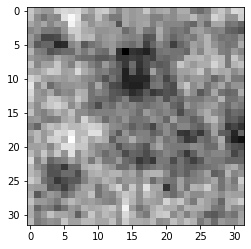

{480.5: 315, 450.5: 607, 422.5: 577, 396.5: 590, 372.5: 590, 350.5: 603, 330.5: 599, 312.5: 873, 296.5: 617, 282.5: 1196, 270.5: 597, 260.5: 596, 252.5: 1163, 246.5: 1155, 242.5: 1129, 240.5: 1151, 420.5: 279, 392.5: 557, 366.5: 581, 342.5: 562, 320.5: 568, 300.5: 591, 266.5: 1135, 230.5: 583, 222.5: 1125, 216.5: 559, 212.5: 1732, 210.5: 570, 364.5: 287, 338.5: 562, 314.5: 552, 292.5: 557, 272.5: 584, 254.5: 578, 238.5: 582, 224.5: 582, 202.5: 583, 194.5: 575, 188.5: 1146, 184.5: 584, 182.5: 1131, 288.5: 546, 228.5: 572, 198.5: 586, 186.5: 573, 176.5: 579, 168.5: 590, 162.5: 1706, 158.5: 588, 156.5: 572, 264.5: 276, 204.5: 574, 174.5: 588, 152.5: 1130, 144.5: 859, 138.5: 593, 134.5: 598, 132.5: 1163, 220.5: 273, 200.5: 559, 166.5: 547, 140.5: 545, 130.5: 557, 122.5: 576, 116.5: 584, 112.5: 872, 110.5: 1167, 180.5: 269, 146.5: 547, 120.5: 576, 102.5: 1128, 96.5: 537, 92.5: 1103, 90.5: 553, 128.5: 558, 114.5: 566, 84.5: 852, 78.5: 559, 74.5: 557, 72.5: 1089, 98.5: 582, 86.5: 556, 76.5: 5

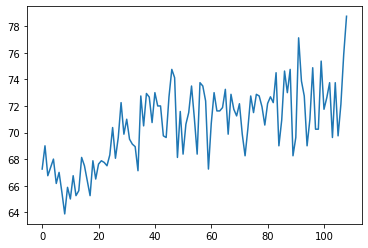

In [ ]:
predictions_file_name = 'drive/My Drive/train_predictions_list_unet320_aug_last.joblib'
targets_file_name = 'drive/My Drive/train_labels_list_unet320_aug_last.joblib'

calculate_radius_error_array(predictions_file_name, targets_file_name)

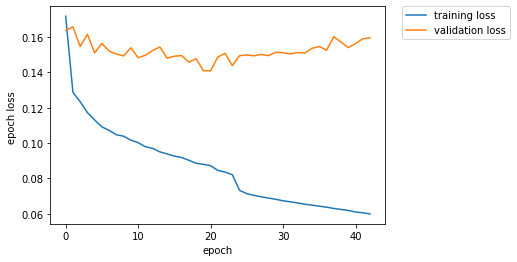

In [ ]:
f = open("drive/My Drive/crawl.txt", "r")
val_loss=[]
train_loss=[]
for i in range(43):
    f.readline()
    s=f.readline()
    train_loss.append(float(s[44:-1]))
    s=f.readline()
    val_loss.append(float(s[42:-1]))
    if(f.readline()=='saving best model\n'):
        f.readline()
    f.readline()
    f.readline()
    # print("d",f.readline())

plt.figure
plt.plot(train_loss, label="training loss")
plt.plot(val_loss, label="validation loss")
plt.xlabel('epoch')
plt.ylabel('epoch loss ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Transfer learning

In [ ]:
import sys
import cv2
from torchsummary import summary
import torch
import torch.nn as nn
import pytorch_unet as pytorch_unet
import matplotlib.pyplot as plt
from functools import reduce
import warnings
import joblib
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from skimage.transform import resize
from osgeo import gdal
import matplotlib.pyplot as plt
from skimage import data
from skimage import exposure
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
import random
import math
from joblib import Memory
from collections import defaultdict
import torch.nn.functional as F
from loss import dice_loss
import os
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Function
from torchvision import models
from torchsummary import summary
import torch
import torch.nn as nn
import cv2
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy
import torchvision.utils
import cv2
from torchsummary import summary
import torch
import torch.nn as nn
import pytorch_unet as pytorch_unet

all_classes=np.unique(np.array([111 , 112 , 121 , 123 , 124 , 131 , 142 , 211 , 221 , 223 , 231 , 242 , 243 , 312 , 313 , 321 , 323 , 324 , 332 , 333 , 411 , 523 ,112 , 123 , 131 , 142 , 211 , 221 , 223 , 231 , 242 , 243 , 311 , 312 , 313 , 321 , 323 , 324 , 331 , 333 , 411 , 421 , 422 , 512 , 521 , 523 ,112 , 121 , 131 , 142 , 211 , 221 , 223 , 231 , 242 , 243 , 311 , 312 , 313 , 321 , 323 , 324 , 333 , 411 , 521 , 523 , 111 , 112 , 121 , 123 , 124 , 141 , 142 , 211 , 221 , 222 , 223 , 231 , 242 , 243 , 311 , 313 , 321 , 323 , 324 , 331 , 332 , 333 , 411 , 421 , 422 , 512 , 521 , 522 , 523 , 112 , 223 , 231 , 242 , 243 , 311 , 312 , 313 , 323 , 324 , 523 , 112 , 223 , 242 , 243 , 323 ,  523 , 112 , 243 , 312 , 313 , 321 , 323 , 523 , 112 , 142 , 212 , 223 , 231 , 242 , 243 , 311 , 312 , 313 , 321 , 323 , 324 , 333 , 411 , 421 , 523 ]))
print(len(all_classes))
class_id={}
for i in range(len(all_classes)):
  class_id[all_classes[i]]=i
print(class_id)

cl = {}
cl[111] = (230,0,77)
cl[112] = (255,0,0)
cl[121] = (204,77,242)
cl[122] = (204,0,0)
cl[123] = (230,204,204)
cl[124] = (230,204,230)
cl[131] = (166,0,204)
cl[132] = (166,77,0)
cl[133] = (255,77,255)
cl[141] = (255,166,255)
cl[142] = (255,230,255)
cl[211] = (255,255,168)
cl[212] = (255,255,0)
cl[213] = (230,230,0)
cl[221] = (230,128,0)
cl[222] = (242,166,77)
cl[223] = (230,166,0)
cl[231] = (230,230,77)
cl[241] = (255,230,166)
cl[242] = (255,230,77)
cl[243] = (230,204,77)
cl[244] = (242,204,166)
cl[311] = (128,255,0)
cl[312] = (0,166,0)
cl[313] = (77,255,0)
cl[321] = (204,242,77)
cl[322] = (166,255,128)
cl[323] = (166,230,77)
cl[324] = (166,242,0)
cl[331] = (230,230,230)
cl[332] = (204,204,204)
cl[333] = (204,255,204)
cl[334] = (0,0,0)
cl[335] = (166,230,204)
cl[411] = (166,166,255)
cl[412] = (77,77,255)
cl[421] = (204,204,255)
cl[422] = (230,230,255)
cl[423] = (166,166,230)
cl[511] = (0,204,242)
cl[512] = (128,242,230)
cl[521] = (0,255,166)
cl[522] = (166,255,230)
cl[523] = (230,242,255)

#==============================================================================================================================================================


def tiff2arr_kef(corine_path, copernicus_path, infra_path, path_05,  path_06,  path_07,  path_8A,  path_11,  path_12, path_txt, width, iid, keep_sea, sent_size,cor_size,sent_hop,cor_hop):

    classes=[]
    f = open(path_txt, "r")
    line = f.readline()
    while line:
        line = f.readline()
        if line == '':
          break
        classes.append(int(line.split(';')[3]))
    f.close()
    # print(classes)


    print("\n")
    X = [[],[],[],[],[],[],[],[],[],[]]
    Y = []
    import matplotlib.pyplot as plt
    dim=0
    with rio.open(copernicus_path) as src_plot:
        print('dim=',src_plot.read([4]).shape)
        dim=src_plot.read([4]).shape
        dim=dim[1:3]
        dim=dim[::-1]


    from PIL import Image
    import numpy as np

    im = Image.open(corine_path)
    im = np.array(im).astype('float32')
    cor_dim=im.shape
    print('corine dim=', im.shape)
    cor_dim=(int(dim[0]),int(dim[1]))
    # # im = Image.open('/home/bill/kefalonia_test.tif')
    import cv2
    imarray = cv2.resize(np.array(im), dsize=cor_dim, interpolation=cv2.INTER_NEAREST )
    imarray = imarray[:,width[0]:width[1]]
    # # 11  56  57  65  67  68  76  77 111 112 121 123 124 131 142 155 211 221
    # # 223 231 242 243
    dim=imarray.shape
    i=0
    while(i+cor_size<=dim[0]):
        j=0
        while(j+cor_size<=dim[1]):
            # elem=imarray[i:i+cor_size,j:j+cor_size]
            # Y.append(elem)
            Y.append([[i,i+cor_size],[j,j+cor_size],[iid,iid]])
            j+=cor_hop
        i+=cor_hop
    
    Y_nov = np.array(imarray)
    for i in range(len(Y_nov)):
      for j in range(len(Y_nov[0])):
        Y_nov[i][j]=classes[int(Y_nov[i][j])-1]
    
    X_nov = [[],[],[],[],[],[],[],[],[],[]]

    from osgeo import gdal
    ds = gdal.Open(infra_path)
    myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
    myarray = myarray[:,width[0]:width[1]]
    i=0
    dim=myarray.shape
    img10_shape=dim
    # print("infra dim= ",dim)
    while(i+sent_size<=dim[0]):
        j=0
        while(j+sent_size<=dim[1]):
            # X[3].append(myarray[i:i+sent_size,j:j+sent_size])
            X[3].append([[i,i+sent_size],[j,j+sent_size],[iid,iid]])
            j+=sent_hop
        i+=sent_hop
    
    X_nov[3] = np.array(myarray)
    
    color=['Red','Green','Blue']

    for band in range(1,4):
        ds = gdal.Open(copernicus_path)
        myarray = np.array(ds.GetRasterBand(band).ReadAsArray())
        myarray = myarray[:,width[0]:width[1]]
        i=0
        dim=myarray.shape
        # print("rgb dim = ",dim)
        while(i+sent_size<=dim[0]):
            j=0
            while(j+sent_size<=dim[1]):
                # X[band-1].append(myarray[i:i+sent_size,j:j+sent_size])
                X[band-1].append([[i,i+sent_size],[j,j+sent_size],[iid,iid]])
                j+=sent_hop
            i+=sent_hop
        X_nov[band-1] = np.array(myarray)

    paths=[path_05,  path_06,  path_07,  path_8A,  path_11,  path_12] 
    for band in range(6): 
      ds = gdal.Open(infra_path)
      myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
      myarray = myarray[:,width[0]:width[1]]
      dim=myarray.shape
      # print("20m dim= ",dim)
      myarray = resize( myarray / 30000, img10_shape, mode='reflect') * 30000
      i=0
      while(i+sent_size<=dim[0]):
          j=0
          while(j+sent_size<=dim[1]):
              # X[band+4].append(myarray[i:i+sent_size,j:j+sent_size])
              X[band+4].append([[i,i+sent_size],[j,j+sent_size],[iid,iid]])
              j+=sent_hop
          i+=sent_hop  
      X_nov[band+4] = np.array(myarray) 
    print("classes found :",np.unique(Y_nov))
    
    
    X_ = []
    Y_ = []

    X = np.array(X, dtype=int)
    Y = np.array(Y, dtype=int)

    X=X[0]



    for w in range(len(X)):
      # if w%100 == 0:
      #   print(w, end=' ')
      idx=Y[w]
      YY=Y_nov[idx[0][0]:idx[0][1],idx[1][0]:idx[1][1]]
      if np.sum(YY)<128*128*523 or keep_sea:
        X_.append(X[w])
        Y_.append(Y[w])
      else:
        pass
        # print(np.argmax(np.sum(YY,axis=(1,2))))
        
    X=np.array(X_)
    Y=np.array(Y_)



    return X, Y, X_nov, Y_nov
    
 
#==============================================================================================================================================================



%matplotlib inline


def tiff2arr(corine_path, copernicus_path, infra_path, path_05,  path_06,  path_07,  path_8A,  path_11,  path_12, path_txt, iid, keep_sea, sent_size,cor_size,sent_hop,cor_hop):

    classes=[]
    f = open(path_txt, "r")
    line = f.readline()
    while line:
        line = f.readline()
        if line == '':
          break
        classes.append(int(line.split(';')[3]))
    f.close()
    # print(classes)

    print("\n")
    X = [[],[],[],[],[],[],[],[],[],[]]
    Y = []
    import matplotlib.pyplot as plt
    dim=0
    with rio.open(copernicus_path) as src_plot:
        print('dim=',src_plot.read([4]).shape)
        dim=src_plot.read([4]).shape
        dim=dim[1:3]
        dim=dim[::-1]


    from PIL import Image
    import numpy as np

    im = Image.open(corine_path)
    im = np.array(im).astype('float32')
    cor_dim=im.shape
    print('corine dim=', im.shape)
    cor_dim=(int(dim[0]),int(dim[1]))
    print('dim=', cor_dim)
    # # im = Image.open('/home/bill/kefalonia_test.tif')
    import cv2
    imarray = cv2.resize(np.array(im), dsize=cor_dim, interpolation=cv2.INTER_NEAREST )
    # # 11  56  57  65  67  68  76  77 111 112 121 123 124 131 142 155 211 221
    # # 223 231 242 243
    dim=imarray.shape
    i=0
    while(i+cor_size<=dim[0]):
        j=0
        while(j+cor_size<=dim[1]):
            # elem=imarray[i:i+cor_size,j:j+cor_size]
            # Y.append(elem)
            Y.append([[i,i+cor_size],[j,j+cor_size],[iid,iid]])
            j+=cor_hop
        i+=cor_hop
    
    Y_nov = np.array(imarray)
    for i in range(len(Y_nov)):
      for j in range(len(Y_nov[0])):
        Y_nov[i][j]=classes[int(Y_nov[i][j])-1]
    
    X_nov = [[],[],[],[],[],[],[],[],[],[]]

    from osgeo import gdal
    ds = gdal.Open(infra_path)
    myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
    i=0
    dim=myarray.shape
    img10_shape=dim
    # print("infra dim= ",dim)
    while(i+sent_size<=dim[0]):
        j=0
        while(j+sent_size<=dim[1]):
            # X[3].append(myarray[i:i+sent_size,j:j+sent_size])
            X[3].append([[i,i+sent_size],[j,j+sent_size],[iid,iid]])
            j+=sent_hop
        i+=sent_hop
    
    X_nov[3] = np.array(myarray)
    
    color=['Red','Green','Blue']

    for band in range(1,4):
        ds = gdal.Open(copernicus_path)
        myarray = np.array(ds.GetRasterBand(band).ReadAsArray())
        i=0
        dim=myarray.shape
        # print("rgb dim = ",dim)
        while(i+sent_size<=dim[0]):
            j=0
            while(j+sent_size<=dim[1]):
                # X[band-1].append(myarray[i:i+sent_size,j:j+sent_size])
                X[band-1].append([[i,i+sent_size],[j,j+sent_size],[iid,iid]])
                j+=sent_hop
            i+=sent_hop
        X_nov[band-1] = np.array(myarray)

    paths=[path_05,  path_06,  path_07,  path_8A,  path_11,  path_12] 
    for band in range(6): 
      ds = gdal.Open(infra_path)
      myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
      dim=myarray.shape
      # print("20m dim= ",dim)
      myarray = resize( myarray / 30000, img10_shape, mode='reflect') * 30000
      i=0
      while(i+sent_size<=dim[0]):
          j=0
          while(j+sent_size<=dim[1]):
              # X[band+4].append(myarray[i:i+sent_size,j:j+sent_size])
              X[band+4].append([[i,i+sent_size],[j,j+sent_size],[iid,iid]])
              j+=sent_hop
          i+=sent_hop  
      X_nov[band+4] = np.array(myarray) 
    print("classes found :",np.unique(Y_nov))
    
    
    X_ = []
    Y_ = []

    X = np.array(X, dtype=int)
    Y = np.array(Y, dtype=int)

    X=X[0]



    for w in range(len(X)):
      # if w%100 == 0:
      #   print(w, end=' ')
      idx=Y[w]
      YY=Y_nov[idx[0][0]:idx[0][1],idx[1][0]:idx[1][1]]
      if np.sum(YY)<128*128*523 or keep_sea:
        X_.append(X[w])
        Y_.append(Y[w])
      else:
        pass
        # print(np.argmax(np.sum(YY,axis=(1,2))))
        
    X=np.array(X_)
    Y=np.array(Y_)



    return X, Y, X_nov, Y_nov
    
#==============================================================================================================================================================

location = './cachedir'
memory = Memory(location, verbose=0)

# @lru_cache(maxsize=None)

# GB = 1024**20
# @lru_cache(use_memory_up_to=(1 * GB))




class SimDataset(Dataset):
    def __init__(self, count, first, transform=None, X=None, Y=None, X_nov=None, Y_nov=None, u=np.zeros(10), s=np.ones(10), rot=False):
        #self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)        
        self.input_images=X
        self.target_masks=Y
        self.transform = transform
        self.count=count
        self.first = first
        self.u=u
        self.s=s
        self.rot=rot
        self.X_nov=X_nov
        self.Y_nov=Y_nov
        # self.costly_load_cached = memory.cache(costly_load_cached)
    
    def __len__(self):
        return self.count
    
    def __getitem__(self, idxx): 


        idx=idxx+self.first  

        X=self.input_images
        Y=self.target_masks
        # X=np.array(load('drive/My Drive/clc/Xf__'+str(idx)+'.joblib'),dtype=np.uint8)
        # Y=np.array(load('drive/My Drive/clc/Yf__'+str(idx)+'.joblib'),dtype=np.float32)
        # x,y = X[idx], Y[idx]
        patch_num = X[idx,2,0]
        patch = self.X_nov[patch_num]
        p=[]
        for band in range(10):
          p0=patch[band,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]]
          p0=(p0-self.u[band])/self.s[band]
          p.append(p0)
        
        x=np.dstack((p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9]))
        
        patch_num = Y[idx,2,0]
        y = np.zeros((32,128,128))
        for i in range(Y[idx,0,0],Y[idx,0,1]):
          for j in range(Y[idx,1,0],Y[idx,1,1]):
            y[class_id[int(self.Y_nov[patch_num][i][j])]][i-Y[idx,0,0]][j-Y[idx,1,0]] = 1
        

        if self.rot:
          r=math.floor(random.uniform(0, 4))
          f=random.random()
          # X[i][j][k]
          # Y[k][i][j]
          # image = np.rot90(X, r, (0,1))
          # mask = np.rot90(Y, r,  (1,2))
          if f>0.5:
            x=np.flip(x,1)
            y=np.flip(y,2)

          image = np.rot90(x, r, (0,1))
          image = image.copy()
          mask = np.rot90(y, r,  (1,2))
          mask = mask.copy()
        
        else:
          image=x
          mask=y

        if self.transform:
            image = self.transform(image)
        
        return [np.array(image,dtype='float'), np.array(mask,dtype='float')]

# use same transform for train/val for this example
trans = transforms.Compose([
    transforms.ToTensor(),
])

#==============================================================================================================================================================

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp
#==============================================================================================================================================================


def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)
        
    pred = F.sigmoid(pred)
    dice = dice_loss(pred, target)
    
    loss = bce * bce_weight + dice * (1 - bce_weight)
    
    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
    return loss

def print_metrics(metrics, epoch_samples, phase):    
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
    print("{}: {}".format(phase, ", ".join(outputs)))    

def train_model(model, optimizer, scheduler, num_epochs, dataloaders, split):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10
    layers=[model.layer0, model.layer1, model.layer2, model.layer3, model.layer4]

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])
                    
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0
            pip=0
            for inputs, labels in dataloaders[phase]:
                pip+=1
                # print(pip)
                inputs = inputs.to(device, dtype=torch.float) 
                labels = labels.to(device)             

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    if epoch<10:                    
                      for l in layers:
                        for param in l.parameters():
                            param.requires_grad = True
                    else:
                       for l in layers:
                        for param in l.parameters():
                            param.requires_grad = True
                                          
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), 'drive/My Drive/files/model_resunet128_best'+split+'.pth.tar')
            if phase == 'val':
                torch.save(model.state_dict(), 'drive/My Drive/files/model_resunet128_last'+split+'.pth.tar')
        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model
#==============================================================================================================================================================
#==============================================================================================================================================================
#==============================================================================================================================================================


32
{111: 0, 112: 1, 121: 2, 123: 3, 124: 4, 131: 5, 141: 6, 142: 7, 211: 8, 212: 9, 221: 10, 222: 11, 223: 12, 231: 13, 242: 14, 243: 15, 311: 16, 312: 17, 313: 18, 321: 19, 323: 20, 324: 21, 331: 22, 332: 23, 333: 24, 411: 25, 421: 26, 422: 27, 512: 28, 521: 29, 522: 30, 523: 31}


In [ ]:
!wget 'http://bigearth.net/static/pretrained-models-pytorch/BigEarthNet-19_labels/ResNet50.pth.tar'

#==============================================================================================================================================================



def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def weights_init_kaiming(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        init.kaiming_normal_(m.weight.data)

def fc_init_weights(m):
    if type(m) == nn.Linear:
        init.kaiming_normal_(m.weight.data)




class ResNet50(nn.Module):
    def __init__(self, numCls = 19):
        super().__init__()

        resnet = models.resnet50(pretrained=False)

        self.conv1 = nn.Conv2d(10, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.encoder = nn.Sequential(
            self.conv1,
            resnet.bn1,
            resnet.relu,
            resnet.maxpool,
            resnet.layer1,
            resnet.layer2,
            resnet.layer3,
            resnet.layer4,
            resnet.avgpool
        )
        self.FC = nn.Linear(2048, numCls)

        self.apply(weights_init_kaiming)
        self.apply(fc_init_weights)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)

        logits = self.FC(x)

        return logits


class ResNet101(nn.Module):
    def __init__(self, numCls = 19):
        super().__init__()

        resnet = models.resnet101(pretrained=False)

        self.conv1 = nn.Conv2d(10, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.encoder = nn.Sequential(
            self.conv1,
            resnet.bn1,
            resnet.relu,
            resnet.maxpool,
            resnet.layer1,
            resnet.layer2,
            resnet.layer3,
            resnet.layer4,
            resnet.avgpool
        )
        self.FC = nn.Linear(2048, numCls)
        
        self.apply(weights_init_kaiming)
        self.apply(fc_init_weights)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)

        logits = self.FC(x)

        return logits



class ResNet152(nn.Module):
    def __init__(self, numCls = 19):
        super().__init__()

        resnet = models.resnet152(pretrained=False)

        self.conv1 = nn.Conv2d(10, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.encoder = nn.Sequential(
            self.conv1,
            resnet.bn1,
            resnet.relu,
            resnet.maxpool,
            resnet.layer1,
            resnet.layer2,
            resnet.layer3,
            resnet.layer4,
            resnet.avgpool
        )
        self.FC = nn.Linear(2048, numCls)

        self.apply(weights_init_kaiming)
        self.apply(fc_init_weights)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)

        logits = self.FC(x)

        return logits



    
inputs = torch.randn((4,10,120,120))

encoder = ResNet50()
net=encoder
# net = ResNet101()
# encoder = ResNet152()

# checkpoint = torch.load('drive/My Drive/ResNet50.pth.tar')
# encoder.load_state_dict(checkpoint['state_dict'])


outputs = net(inputs)

print(outputs.shape)

numParams = count_parameters(net)

print(f"{numParams:.2E}")

#==============================================================================================================================================================

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = encoder
model = model.to(device)
# summary(model, input_size=(10, 256, 256))

x = torch.zeros(2, 10, 128, 128, dtype=torch.float, requires_grad=False).to(device)
out = model(x)

# make_dot(out).render("attached", format="png")
# make_dot(out).render("rnn_torchviz", format="png")

# x=torch.ones(10, requires_grad=True)
# weights = {'x':x}

# y=x**2
# z=x**3
# r=(y+z).sum()

# make_dot(r).render("attached", format="png")

# from graphviz import Source
# model_arch = make_dot(r).render("attached", format="png")
# Source(model_arch).render('./l');
#==============================================================================================================================================================

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )

class ResNetUNet(nn.Module):

    def __init__(self, n_class):
        super().__init__()

        # l=list(model.children())
        # lc=list(l[1].children())

        # resnet = models.resnet50(pretrained=False)
        #         self.conv1 = nn.Conv2d(10, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) l[0]
        #         self.encoder = nn.Sequential(
        #             self.conv1, lc[0]
        #             resnet.bn1, lc[1]
        #             resnet.relu,  lc[2]
        #             resnet.maxpool,  lc[3]
        #             resnet.layer1,   lc[4]
        #             resnet.layer2,   lc[5]
        #             resnet.layer3,   lc[6]
        #             resnet.layer4,   lc[7]
        #             resnet.avgpool   lc[8]
        #         )
        #         self.FC = nn.Linear(2048, numCls)  l[2]
        #def forward(self, x):
        # x = self.encoder(x)
        # x = x.view(x.size(0), -1)
        # logits = self.FC(x)
        # return logits
        #-------------------
                    
        self.base_model = encoder

        l=list(self.base_model.children())
        lc=list(l[1].children())

        self.base_layers = lc                
        
        self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
        self.layer0_1x1 = convrelu(64, 64, 1, 0)
        self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 256, x.H/4, x.W/4)        
        self.layer1_1x1 = convrelu(256, 64, 1, 0)       
        self.layer2 = self.base_layers[5]  # size=(N, 512, x.H/8, x.W/8)        
        self.layer2_1x1 = convrelu(512, 128, 1, 0)  
        self.layer3 = self.base_layers[6]  # size=(N, 1024, x.H/16, x.W/16)        
        self.layer3_1x1 = convrelu(1024, 256, 1, 0)  
        self.layer4 = self.base_layers[7]  # size=(N, 2048, x.H/32, x.W/32)
        self.layer4_1x1 = convrelu(2048, 512, 1, 0)  
        
        #  64     64      128      256           512
        #  64     256     512      1024          2048

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
        self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
        self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
        self.conv_up0 = convrelu(64 + 256, 128, 3, 1)
        
        self.conv_original_size0 = convrelu(10, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
    def forward(self, input):
        x_original = self.conv_original_size0(input)          # size=(N, 64, x.H, x.W)       
        x_original = self.conv_original_size1(x_original)     # size=(N, 64, x.H, x.W)
        
        layer0 = self.layer0(input)            # size=(N, 64, x.H/2, x.W/2)
        layer1 = self.layer1(layer0)           # size=(N, 256, x.H/4, x.W/4) 
        layer2 = self.layer2(layer1)           # size=(N, 512, x.H/8, x.W/8)
        layer3 = self.layer3(layer2)           # size=(N, 1024, x.H/16, x.W/16)
        layer4 = self.layer4(layer3)           # size=(N, 2048, x.H/32, x.W/32)
        
        layer4 = self.layer4_1x1(layer4)       # size=(N, 512, x.H/32, x.W/32)
        x = self.upsample(layer4)              # size=(N, 512, x.H/16, x.W/16)
        layer3 = self.layer3_1x1(layer3)       # size=(N, 256, x.H/16, x.W/16)
        x = torch.cat([x, layer3], dim=1)      # size=(N, 256+512, x.H/16, x.W/16)
        x = self.conv_up3(x)                   # size=(N, 512, x.H/16, x.W/16)
 
        x = self.upsample(x)                   # size=(N, 512, x.H/8, x.W/8)
        layer2 = self.layer2_1x1(layer2)       # size=(N, 128, x.H/8, x.W/8)
        x = torch.cat([x, layer2], dim=1)      # size=(N, 128+512, x.H/8, x.W/8)
        x = self.conv_up2(x)                   # size=(N, 256, x.H/8, x.W/8)

        x = self.upsample(x)                   # size=(N, 256, x.H/4, x.W/4)
        layer1 = self.layer1_1x1(layer1)       # size=(N, 64, x.H/4, x.W/4)
        x = torch.cat([x, layer1], dim=1)      # size=(N, 64+256, x.H/4, x.W/4)
        x = self.conv_up1(x)                   # size=(N, 256, x.H/4, x.W/4)

        x = self.upsample(x)                   # size=(N, 256, x.H/2, x.W/2)
        layer0 = self.layer0_1x1(layer0)       # size=(N, 64, x.H/2, x.W/2)
        x = torch.cat([x, layer0], dim=1)      # size=(N, 64+256, x.H/2, x.W/2)
        x = self.conv_up0(x)                   # size=(N, 128, x.H/2, x.W/2)
        
        x = self.upsample(x)                   # size=(N, 128, x.H, x.W)
        x = torch.cat([x, x_original], dim=1)  # size=(N, 128+64, x.H, x.W)
        x = self.conv_original_size2(x)        # size=(N, 64, x.H, x.W)  
        
        out = self.conv_last(x)                # size=(N, num_classes, x.H, x.W)
        
        return out
#==============================================================================================================================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNetUNet(32)
model = model.to(device)
summary(model, input_size=(10, 128, 128))
#==============================================================================================================================================================
!ls drive/My\ Drive/files
# Kastos	Kef  Leuk  N.Ker  Parga  Paxoi	S.ker  Zak
!cp -r drive/My\ Drive/files/ .
#==============================================================================================================================================================
!ls files/N_Ker
#==============================================================================================================================================================



--2020-08-29 05:49:03--  http://bigearth.net/static/pretrained-models-pytorch/BigEarthNet-19_labels/ResNet50.pth.tar
Resolving bigearth.net (bigearth.net)... 130.149.21.68
Connecting to bigearth.net (bigearth.net)|130.149.21.68|:80... connected.
HTTP request sent, awaiting response... 404 NOT FOUND
2020-08-29 05:49:03 ERROR 404: NOT FOUND.

torch.Size([4, 19])
2.36E+07
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           5,824
              ReLU-2         [-1, 64, 128, 128]               0
            Conv2d-3         [-1, 64, 128, 128]          36,928
              ReLU-4         [-1, 64, 128, 128]               0
            Conv2d-5           [-1, 64, 64, 64]          31,360
            Conv2d-6           [-1, 64, 64, 64]          31,360
            Conv2d-7           [-1, 64, 64, 64]          31,360
       BatchNorm2d-8           [-1, 64, 64, 64]    

In [ ]:
def training(split):
  sent_size=128
  cor_size=128

  sent_hop=64
  cor_hop=64

  

  X1,Y1, X_nov1, Y_nov1 = tiff2arr_kef('files/Kef/Kef_corine_raster22.tif', 'files/Kef/Kef_RGB_cliped.tif', 'files/Kef/Kef_B8_cliped.tif',
                                  'files/Kef/Kef_B5_cliped.tif ', 'files/Kef/Kef_B6_cliped.tif', 'files/Kef/Kef_B7_cliped.tif', 
                                  'files/Kef/Kef_B8A_cliped.tif', 'files/Kef/Kef_B11_cliped.tif' , 'files/Kef/Kef_B12_cliped.tif ', 'files/Kef/Kef.txt', (0,2500),1,False, sent_size,cor_size,sent_hop,cor_hop)

  X1=np.array(X1)
  Y1=np.array(Y1)
  print(X1.shape)
  print(Y1.shape)

  X2,Y2, X_nov2, Y_nov2 = tiff2arr_kef('files/Kef/Kef_corine_raster22.tif', 'files/Kef/Kef_RGB_cliped.tif', 'files/Kef/Kef_B8_cliped.tif',
                                  'files/Kef/Kef_B5_cliped.tif ', 'files/Kef/Kef_B6_cliped.tif', 'files/Kef/Kef_B7_cliped.tif', 
                                  'files/Kef/Kef_B8A_cliped.tif', 'files/Kef/Kef_B11_cliped.tif' , 'files/Kef/Kef_B12_cliped.tif ', 'files/Kef/Kef.txt', (2500,5515),2,False, sent_size,cor_size,sent_hop,cor_hop)

  X2=np.array(X2)
  Y2=np.array(Y2)
  print(X2.shape)
  print(Y2.shape)





  X3,Y3, X_nov3, Y_nov3 = tiff2arr('files/Leuk/Corine_R_Lefk.tif', 'files/Leuk/Lefk_RGB_Cliped.tif', 'files/Leuk/Lefk_B8_Cliped.tif',
                                  'files/Leuk/Lefk_B5_Cliped.tif ', 'files/Leuk/Lefk_B6_Cliped.tif', 'files/Leuk/Lefk_B7_Cliped.tif', 
                                  'files/Leuk/Lefk_B8A_Cliped.tif', 'files/Leuk/Lefk_B11_Cliped.tif' , 'files/Leuk/Lefk_B12_Cliped.tif ', 'files/Leuk/Lefkada.txt',3 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X3=np.array(X3)
  Y3=np.array(Y3)
  print(X3.shape)
  print(Y3.shape)


  X4,Y4, X_nov4, Y_nov4 = tiff2arr('files/N_Ker/Corine_r_N.ker.tif', 'files/N_Ker/N_ker_RGB_cliped.tif', 'files/N_Ker/N_ker_B8_cliped.tif',
                                  'files/N_Ker/N_ker_B5_cliped.tif ', 'files/N_Ker/N_ker_B6_cliped.tif', 'files/N_Ker/N_ker_B7_cliped.tif', 
                                  'files/N_Ker/N_ker_B8A_cliped.tif', 'files/N_Ker/N_ker_B11_cliped.tif' , 'files/N_ker/N_Ker_B12_cliped.tif ', 'files/N_Ker/N_ker.txt',4 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X4=np.array(X4)
  Y4=np.array(Y4)
  print(X4.shape)
  print(Y4.shape)



  X5,Y5, X_nov5, Y_nov5 = tiff2arr('files/S_ker/Corine_R_SK.tif', 'files/S_ker/S_ker_RGB_cliped.tif', 'files/S_ker/S_ker_B8_cliped.tif',
                                  'files/S_ker/S_ker_B5_cliped.tif ', 'files/S_ker/S_ker_B6_cliped.tif', 'files/S_ker/S_ker_B7_cliped.tif', 
                                  'files/S_ker/S_ker_B8A_cliped.tif', 'files/S_ker/S_ker_B11_cliped.tif' , 'files/S_ker/S_Ker_B12_cliped.tif ', 'files/S_ker/SK.txt',5 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X5=np.array(X5)
  Y5=np.array(Y5)
  print(X5.shape)
  print(Y5.shape)


  X6,Y6, X_nov6, Y_nov6 = tiff2arr('files/Zak/Corine_zak_raster.tif', 'files/Zak/Zak_RGB_Cliped.tif', 'files/Zak/Zak_B8_Cliped.tif',
                                  'files/Zak/Zak_B5_Cliped.tif ', 'files/Zak/Zak_B6_Cliped.tif', 'files/Zak/Zak_B7_Cliped.tif', 
                                  'files/Zak/Zak_B8A_Cliped.tif', 'files/Zak/Zak_B11_Cliped.tif' , 'files/Zak/Zak_B12_Cliped.tif ', 'files/Zak/zakinthos.txt',6 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X6=np.array(X6)
  Y6=np.array(Y6)
  print(X6.shape)
  print(Y6.shape)



  X7,Y7, X_nov7, Y_nov7 = tiff2arr('files/Paxoi/Corine_R_paxoi.tif', 'files/Paxoi/Paxoi_RGB_Cliped.tif', 'files/Paxoi/Paxoi_B8_Cliped.tif',
                                  'files/Paxoi/Paxoi_B5_Cliped.tif ', 'files/Paxoi/Paxoi_B6_Cliped.tif', 'files/Paxoi/Paxoi_B7_Cliped.tif', 
                                  'files/Paxoi/Paxoi_B8A_Cliped.tif', 'files/Paxoi/Paxoi_B11_Cliped.tif' , 'files/Paxoi/Paxoi_B12_Cliped.tif ', 'files/Paxoi/Paxoi.txt',7 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X7=np.array(X7)
  Y7=np.array(Y7)
  print(X7.shape)
  print(Y7.shape)



  X8,Y8, X_nov8, Y_nov8 = tiff2arr('files/Kastos/Corine_R_Kastos.tif', 'files/Kastos/Kastos_RGB_cliped.tif', 'files/Kastos/Kastos_B8_cliped.tif',
                                  'files/Kastos/Kastos_B5_cliped.tif ', 'files/Kastos/Kastos_B6_cliped.tif', 'files/Kastos/Kastos_B7_cliped.tif', 
                                  'files/Kastos/Kastos_B8A_cliped.tif', 'files/Kastos/Kastos_B11_cliped.tif' , 'files/Kastos/Kastos_B12_cliped.tif ', 'files/Kastos/Kastos.txt',8 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X8=np.array(X8)
  Y8=np.array(Y8)
  print(X8.shape)
  print(Y8.shape)




  X9,Y9, X_nov9, Y_nov9 = tiff2arr('files/Parga/Corine_parga_raster.tif', 'files/Parga/Parga_RGB_Cliped.tif', 'files/Parga/Parga_B8_Cliped.tif',
                                  'files/Parga/Parga_B5_Cliped.tif ', 'files/Parga/Parga_B6_Cliped.tif', 'files/Parga/Parga_B7_Cliped.tif', 
                                  'files/Parga/Parga_B8A_Cliped.tif', 'files/Parga/Parga_B11_Cliped.tif' , 'files/Parga/Parga_B12_Cliped.tif ', 'files/Parga/parga.txt',9 ,False, sent_size,cor_size,sent_hop,cor_hop)

  X9=np.array(X9)
  Y9=np.array(Y9)
  print(X9.shape)
  print(Y9.shape)

  X_nov1=np.array(X_nov1)
  Y_nov1=np.array(Y_nov1)

  X_nov2=np.array(X_nov2)
  Y_nov2=np.array(Y_nov2)

  X_nov3=np.array(X_nov3)
  Y_nov3=np.array(Y_nov3)

  X_nov4=np.array(X_nov4)
  Y_nov4=np.array(Y_nov4)

  X_nov5=np.array(X_nov5)
  Y_nov5=np.array(Y_nov5)

  X_nov6=np.array(X_nov6)
  Y_nov6=np.array(Y_nov6)

  X_nov7=np.array(X_nov7)
  Y_nov7=np.array(Y_nov7)

  X_nov8=np.array(X_nov8)
  Y_nov8=np.array(Y_nov8)

  X_nov9=np.array(X_nov9)
  Y_nov9=np.array(Y_nov9)

  X_nov = ['0',X_nov1,X_nov2,X_nov3,X_nov4,X_nov5,X_nov6,X_nov7,X_nov8,X_nov9]
  Y_nov = ['0',Y_nov1,Y_nov2,Y_nov3,Y_nov4,Y_nov5,Y_nov6,Y_nov7,Y_nov8,Y_nov9]

  X_s = ['0',X1,X2,X3,X4,X5,X6,X7,X8,X9]
  Y_s = ['0',Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9]

  #==============================================================================================================================================================
  X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
  Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)


  u10=np.unique(Y1)
  print(u10)
  del(u10)

  idx=150

  y_show=np.zeros((128,128,3))


  Y_nov1=np.array(Y_nov1)
  print(Y_nov1.shape)
  for i in range(Y[idx,0,0],Y[idx,0,1]):
      for j in range(Y[idx,1,0],Y[idx,1,1]):
          tmp=np.array(cl[int(Y_nov1[i][j])])
          # print(Y_nov1[i][j])
          # print(cl[int(Y_nov1[i][j])])
          y_show[i-Y[idx,0,0],j-Y[idx,1,0],:]=tmp



  plt.imshow(y_show/255)
  plt.title('y: clc')
  plt.show()

  X_nov1=np.array(X_nov1)
  print(X_nov1.shape)


  arr=np.dstack((X_nov1[0,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]],X_nov1[1,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]],X_nov1[2,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]]))
  arr=np.array(arr,'int')
  print(arr.shape)
  plt.imshow(arr)
  plt.title('x: sentinel2')
  plt.show()
  #==============================================================================================================================================================
  len_arr = [len(X1),len(X2),len(X3),len(X4),len(X5),len(X6)+len(X7)+len(X8)+len(X9)]
  print(len_arr)

  print(X_nov1.shape)

  if split=='1':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov2[band].flatten(), X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov1[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, 0, axis=0)
    Y = np.roll(Y, 0, axis=0)
    X_test = X[:len_arr[0]]
    X_train = X[len_arr[0]:]
    Y_test = Y[:len_arr[0]]
    Y_train = Y[len_arr[0]:]

  elif split=='2':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov2[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0], axis=0)
    Y = np.roll(Y, -len_arr[0], axis=0)
    X_test = X[:len_arr[1]]
    X_train = X[len_arr[1]:]
    Y_test = Y[:len_arr[1]]
    Y_train = Y[len_arr[1]:]

  elif split=='3':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov3[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1], axis=0)
    X_test = X[:len_arr[2]]
    X_train = X[len_arr[2]:]
    Y_test = Y[:len_arr[2]]
    Y_train = Y[len_arr[2]:]

  elif split=='4':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov3[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov4[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1]-len_arr[2], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1]-len_arr[2], axis=0)
    X_test = X[:len_arr[3]]
    X_train = X[len_arr[3]:]
    Y_test = Y[:len_arr[3]]
    Y_train = Y[len_arr[3]:]

  elif split=='5':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov5[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3], axis=0)
    X_test = X[:len_arr[4]]
    X_train = X[len_arr[4]:]
    Y_test = Y[:len_arr[4]]
    Y_train = Y[len_arr[4]:]

  elif split=='6':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = allvalues_train = np.concatenate(( X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3]-len_arr[4], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3]-len_arr[4], axis=0)
    X_test = X[:len_arr[5]]
    X_train = X[len_arr[5]:]
    Y_test = Y[:len_arr[5]]
    Y_train = Y[len_arr[5]:]



  X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
  Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
  #==============================================================================================================================================================
  
  val_set = SimDataset(len(X_test), 0,  transform = trans,X=X_test,Y=Y_test, X_nov=X_nov, Y_nov=Y_nov, u=u_test,s=s_test, rot=True)
  train_set = SimDataset(len(X_train), 0,  transform = trans,X=X_train,Y=Y_train, X_nov=X_nov, Y_nov=Y_nov, u=u_train,s=s_train, rot=False)

  image_datasets = {
      'train': train_set, 'val': val_set
  }

  batch_size = 4

  dataloaders = {
      'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
      'val': DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0)
  }

  dataset_sizes = {
      x: len(image_datasets[x]) for x in image_datasets.keys()
  }

  print(dataset_sizes)
  #==============================================================================================================================================================
  # Get a batch of training data
  inputs, masks = next(iter(dataloaders['train']))

  print(inputs.shape, masks.shape)
  for x in [inputs.numpy(), masks.numpy()]:
      print(x.min(), x.max(), x.mean(), x.std())

  plt.imshow(reverse_transform(inputs[0,0:4]))
  #==============================================================================================================================================================


  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)

  num_class = 32

  model = ResNetUNet(num_class).to(device)

  # Observe that all parameters are being optimized
  optimizer_ft = optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

  exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=25, gamma=0.1)

  # model.load_state_dict(torch.load('drive/My Drive/files/model_resunet128_trained_best1.pth.tar'))
  model = train_model(model, optimizer_ft, exp_lr_scheduler, 40, dataloaders, split)
  #==============================================================================================================================================================

In [ ]:
def testing(split,stop):
  num_class = 32
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = ResNetUNet(num_class).to(device)
  model.load_state_dict(torch.load('drive/My Drive/files/model_resunet128_'+stop+split+'.pth.tar'))

  #==============================================================================================================================================================


  sent_size=128
  cor_size=128

  sent_hop=128
  cor_hop=128

  #==============================================================================================================================================================

  X1,Y1, X_nov1, Y_nov1 = tiff2arr_kef('files/Kef/Kef_corine_raster22.tif', 'files/Kef/Kef_RGB_cliped.tif', 'files/Kef/Kef_B8_cliped.tif',
                                  'files/Kef/Kef_B5_cliped.tif ', 'files/Kef/Kef_B6_cliped.tif', 'files/Kef/Kef_B7_cliped.tif', 
                                  'files/Kef/Kef_B8A_cliped.tif', 'files/Kef/Kef_B11_cliped.tif' , 'files/Kef/Kef_B12_cliped.tif ', 'files/Kef/Kef.txt', (0,2500),1,True, sent_size,cor_size,sent_hop,cor_hop)

  X1=np.array(X1)
  Y1=np.array(Y1)
  print(X1.shape)
  print(Y1.shape)

  X2,Y2, X_nov2, Y_nov2 = tiff2arr_kef('files/Kef/Kef_corine_raster22.tif', 'files/Kef/Kef_RGB_cliped.tif', 'files/Kef/Kef_B8_cliped.tif',
                                  'files/Kef/Kef_B5_cliped.tif ', 'files/Kef/Kef_B6_cliped.tif', 'files/Kef/Kef_B7_cliped.tif', 
                                  'files/Kef/Kef_B8A_cliped.tif', 'files/Kef/Kef_B11_cliped.tif' , 'files/Kef/Kef_B12_cliped.tif ', 'files/Kef/Kef.txt', (2500,5515),2,True, sent_size,cor_size,sent_hop,cor_hop)

  X2=np.array(X2)
  Y2=np.array(Y2)
  print(X2.shape)
  print(Y2.shape)





  X3,Y3, X_nov3, Y_nov3 = tiff2arr('files/Leuk/Corine_R_Lefk.tif', 'files/Leuk/Lefk_RGB_Cliped.tif', 'files/Leuk/Lefk_B8_Cliped.tif',
                                  'files/Leuk/Lefk_B5_Cliped.tif ', 'files/Leuk/Lefk_B6_Cliped.tif', 'files/Leuk/Lefk_B7_Cliped.tif', 
                                  'files/Leuk/Lefk_B8A_Cliped.tif', 'files/Leuk/Lefk_B11_Cliped.tif' , 'files/Leuk/Lefk_B12_Cliped.tif ', 'files/Leuk/Lefkada.txt',3 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X3=np.array(X3)
  Y3=np.array(Y3)
  print(X3.shape)
  print(Y3.shape)


  X4,Y4, X_nov4, Y_nov4 = tiff2arr('files/N_Ker/Corine_r_N.ker.tif', 'files/N_Ker/N_ker_RGB_cliped.tif', 'files/N_Ker/N_ker_B8_cliped.tif',
                                  'files/N_Ker/N_ker_B5_cliped.tif ', 'files/N_Ker/N_ker_B6_cliped.tif', 'files/N_Ker/N_ker_B7_cliped.tif', 
                                  'files/N_Ker/N_ker_B8A_cliped.tif', 'files/N_Ker/N_ker_B11_cliped.tif' , 'files/N_ker/N_Ker_B12_cliped.tif ', 'files/N_Ker/N_ker.txt',4 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X4=np.array(X4)
  Y4=np.array(Y4)
  print(X4.shape)
  print(Y4.shape)



  X5,Y5, X_nov5, Y_nov5 = tiff2arr('files/S_ker/Corine_R_SK.tif', 'files/S_ker/S_ker_RGB_cliped.tif', 'files/S_ker/S_ker_B8_cliped.tif',
                                  'files/S_ker/S_ker_B5_cliped.tif ', 'files/S_ker/S_ker_B6_cliped.tif', 'files/S_ker/S_ker_B7_cliped.tif', 
                                  'files/S_ker/S_ker_B8A_cliped.tif', 'files/S_ker/S_ker_B11_cliped.tif' , 'files/S_ker/S_Ker_B12_cliped.tif ', 'files/S_ker/SK.txt',5 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X5=np.array(X5)
  Y5=np.array(Y5)
  print(X5.shape)
  print(Y5.shape)


  X6,Y6, X_nov6, Y_nov6 = tiff2arr('files/Zak/Corine_zak_raster.tif', 'files/Zak/Zak_RGB_Cliped.tif', 'files/Zak/Zak_B8_Cliped.tif',
                                  'files/Zak/Zak_B5_Cliped.tif ', 'files/Zak/Zak_B6_Cliped.tif', 'files/Zak/Zak_B7_Cliped.tif', 
                                  'files/Zak/Zak_B8A_Cliped.tif', 'files/Zak/Zak_B11_Cliped.tif' , 'files/Zak/Zak_B12_Cliped.tif ', 'files/Zak/zakinthos.txt',6 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X6=np.array(X6)
  Y6=np.array(Y6)
  print(X6.shape)
  print(Y6.shape)



  X7,Y7, X_nov7, Y_nov7 = tiff2arr('files/Paxoi/Corine_R_paxoi.tif', 'files/Paxoi/Paxoi_RGB_Cliped.tif', 'files/Paxoi/Paxoi_B8_Cliped.tif',
                                  'files/Paxoi/Paxoi_B5_Cliped.tif ', 'files/Paxoi/Paxoi_B6_Cliped.tif', 'files/Paxoi/Paxoi_B7_Cliped.tif', 
                                  'files/Paxoi/Paxoi_B8A_Cliped.tif', 'files/Paxoi/Paxoi_B11_Cliped.tif' , 'files/Paxoi/Paxoi_B12_Cliped.tif ', 'files/Paxoi/Paxoi.txt',7 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X7=np.array(X7)
  Y7=np.array(Y7)
  print(X7.shape)
  print(Y7.shape)



  X8,Y8, X_nov8, Y_nov8 = tiff2arr('files/Kastos/Corine_R_Kastos.tif', 'files/Kastos/Kastos_RGB_cliped.tif', 'files/Kastos/Kastos_B8_cliped.tif',
                                  'files/Kastos/Kastos_B5_cliped.tif ', 'files/Kastos/Kastos_B6_cliped.tif', 'files/Kastos/Kastos_B7_cliped.tif', 
                                  'files/Kastos/Kastos_B8A_cliped.tif', 'files/Kastos/Kastos_B11_cliped.tif' , 'files/Kastos/Kastos_B12_cliped.tif ', 'files/Kastos/Kastos.txt',8 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X8=np.array(X8)
  Y8=np.array(Y8)
  print(X8.shape)
  print(Y8.shape)




  X9,Y9, X_nov9, Y_nov9 = tiff2arr('files/Parga/Corine_parga_raster.tif', 'files/Parga/Parga_RGB_Cliped.tif', 'files/Parga/Parga_B8_Cliped.tif',
                                  'files/Parga/Parga_B5_Cliped.tif ', 'files/Parga/Parga_B6_Cliped.tif', 'files/Parga/Parga_B7_Cliped.tif', 
                                  'files/Parga/Parga_B8A_Cliped.tif', 'files/Parga/Parga_B11_Cliped.tif' , 'files/Parga/Parga_B12_Cliped.tif ', 'files/Parga/parga.txt',9 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X9=np.array(X9)
  Y9=np.array(Y9)
  print(X9.shape)
  print(Y9.shape)

  X_nov1=np.array(X_nov1)
  Y_nov1=np.array(Y_nov1)

  X_nov2=np.array(X_nov2)
  Y_nov2=np.array(Y_nov2)

  X_nov3=np.array(X_nov3)
  Y_nov3=np.array(Y_nov3)

  X_nov4=np.array(X_nov4)
  Y_nov4=np.array(Y_nov4)

  X_nov5=np.array(X_nov5)
  Y_nov5=np.array(Y_nov5)

  X_nov6=np.array(X_nov6)
  Y_nov6=np.array(Y_nov6)

  X_nov7=np.array(X_nov7)
  Y_nov7=np.array(Y_nov7)

  X_nov8=np.array(X_nov8)
  Y_nov8=np.array(Y_nov8)

  X_nov9=np.array(X_nov9)
  Y_nov9=np.array(Y_nov9)

  X_nov = ['0',X_nov1,X_nov2,X_nov3,X_nov4,X_nov5,X_nov6,X_nov7,X_nov8,X_nov9]
  Y_nov = ['0',Y_nov1,Y_nov2,Y_nov3,Y_nov4,Y_nov5,Y_nov6,Y_nov7,Y_nov8,Y_nov9]

  X_s = ['0',X1,X2,X3,X4,X5,X6,X7,X8,X9]
  Y_s = ['0',Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9]

  X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
  Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)

  #==============================================================================================================================================================
  len_arr = [len(X1),len(X2),len(X3),len(X4),len(X5),len(X6)+len(X7)+len(X8)+len(X9)]
  print(len_arr)

  print(X_nov1.shape)

  if split=='1':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov2[band].flatten(), X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov1[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, 0, axis=0)
    Y = np.roll(Y, 0, axis=0)
    X_test = X[:len_arr[0]]
    X_train = X[len_arr[0]:]
    Y_test = Y[:len_arr[0]]
    Y_train = Y[len_arr[0]:]

  elif split=='2':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov2[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0], axis=0)
    Y = np.roll(Y, -len_arr[0], axis=0)
    X_test = X[:len_arr[1]]
    X_train = X[len_arr[1]:]
    Y_test = Y[:len_arr[1]]
    Y_train = Y[len_arr[1]:]

  elif split=='3':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov3[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1], axis=0)
    X_test = X[:len_arr[2]]
    X_train = X[len_arr[2]:]
    Y_test = Y[:len_arr[2]]
    Y_train = Y[len_arr[2]:]

  elif split=='4':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov3[band].flatten(),X_nov5[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov4[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1]-len_arr[2], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1]-len_arr[2], axis=0)
    X_test = X[:len_arr[3]]
    X_train = X[len_arr[3]:]
    Y_test = Y[:len_arr[3]]
    Y_train = Y[len_arr[3]:]

  elif split=='5':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = X_nov5[band].flatten()
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3], axis=0)
    X_test = X[:len_arr[4]]
    X_train = X[len_arr[4]:]
    Y_test = Y[:len_arr[4]]
    Y_train = Y[len_arr[4]:]

  elif split=='6':
    u_train=np.zeros(10)
    s_train=np.zeros(10)
    for band in range(10):
      allvalues_train = np.concatenate(( X_nov1[band].flatten(), X_nov2[band].flatten(),X_nov3[band].flatten(),X_nov4[band].flatten(),X_nov5[band].flatten()))
      u_train[band]=np.mean(allvalues_train)
      s_train[band]=np.std(allvalues_train)
    u_test=np.zeros(10)
    s_test=np.zeros(10)
    for band in range(10):
      allvalues_test = allvalues_train = np.concatenate(( X_nov6[band].flatten(),X_nov7[band].flatten(),X_nov8[band].flatten(),X_nov9[band].flatten()))
      u_test[band]=np.mean(allvalues_test)
      s_test[band]=np.std(allvalues_test)
    X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
    Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
    X = np.roll(X, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3]-len_arr[4], axis=0)
    Y = np.roll(Y, -len_arr[0]-len_arr[1]-len_arr[2]-len_arr[3]-len_arr[4], axis=0)
    X_test = X[:len_arr[5]]
    X_train = X[len_arr[5]:]
    Y_test = Y[:len_arr[5]]
    Y_train = Y[len_arr[5]:]



  X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis=0)
  Y = np.concatenate((Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)

  #==============================================================================================================================================================
  l1 = len(X_test)
  if l1%2 !=0 : l1-=1
  l2 = len(X_train)
  if l2%2 !=0 : l2-=1

  val_set = SimDataset(l1, 0,  transform = trans,X=X_test,Y=Y_test, X_nov=X_nov, Y_nov=Y_nov, u=u_test,s=s_test, rot=False)
  train_set = SimDataset(l2, 0,  transform = trans,X=X_train,Y=Y_train, X_nov=X_nov, Y_nov=Y_nov, u=u_train,s=s_train, rot=False)

  image_datasets = {
      'train': train_set, 'val': val_set
  }

  batch_size = 2

  dataloaders = {
      'train': DataLoader(train_set, batch_size=batch_size, shuffle=False, num_workers=0),
      'val': DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0)
  }

  dataset_sizes = {
      x: len(image_datasets[x]) for x in image_datasets.keys()
  }

  print(dataset_sizes)
  #==============================================================================================================================================================


  def masks_to_id(masks):

    
    colorimg = np.ones((masks.shape[1], masks.shape[2]), dtype=np.int) 
    channels, height, width = masks.shape

    for y in range(height):
      for x in range(width):
          colorimg[y,x] = np.argmax(masks[:,y,x])

    return colorimg.astype(np.uint8)

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  i=0

  for t in ['train', 'val']:
    predictions_list=[]
    labels_list=[]
    for inputs, labels in dataloaders[t]:
        i+=1
        if i%500 == 0:
          print(i)
        inputs = inputs.to(device, dtype=torch.float) 
        labels = labels.to(device)             
        model.eval() 
        # forward
        # track history if only in train
        with torch.set_grad_enabled(False):
            labels=labels.cpu().numpy()
            pred = model(inputs)
            pred = pred.data.cpu().numpy()
          
            target_masks_id= [masks_to_id(x) for x in labels]
            pred_id = [masks_to_id(x) for x in pred]
            
            predictions_list.append(pred_id[0])
            predictions_list.append(pred_id[1])

            labels_list.append(target_masks_id[0])
            labels_list.append(target_masks_id[1])
    dump(predictions_list,'drive/My Drive/'+t+'_predictions_list_uresnet_aug_'+stop+split+'.joblib') 
    dump(labels_list,'drive/My Drive/'+t+'_labels_list_uresnet_aug_'+stop+split+'.joblib') 
    print(len(predictions_list))
  #==============================================================================================================================================================

  #==============================================================================================================================================================
  def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
      plt.matshow(df_confusion, cmap=cmap) # imshow
      #plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(df_confusion.columns))
      plt.xticks(tick_marks, df_confusion.columns, rotation=45)
      plt.yticks(tick_marks, df_confusion.index)
      #plt.tight_layout()
      plt.ylabel(df_confusion.index.name)
      plt.xlabel(df_confusion.columns.name)

  def calculate_confusion_matrix(predictions_file_name, targets_file_name):
      prediction_labels = np.array(joblib.load(predictions_file_name))
      target_labels = np.array(joblib.load(targets_file_name))
      print(prediction_labels.shape)
      print(target_labels.shape)
      
      n, m, l = prediction_labels.shape
      
      label_set = set()
      for i in range(n):
          for j in range(m):
              for k in range(l):
                  label_set.add(prediction_labels[i, j, k])
                  label_set.add(target_labels[i, j, k])
      
      label_map = {}
      for label_id in label_set:
          label_map[label_id] = len(label_map)
      
      num_of_labels = len(label_set)
      label_cnts = np.zeros((num_of_labels,), dtype=np.int32)
      
      cf_cv = np.zeros((num_of_labels, num_of_labels), dtype=np.int32)
      hits=0
      misses=0
      preds=[]
      targs=[]
      for i in range(n):
          for j in range(m):
              for k in range(l):
                  prediction = label_map[prediction_labels[i, j, k]]
                  target = label_map[target_labels[i, j, k]]
                  preds.append(prediction)
                  targs.append(target)
                  if prediction==target:
                    hits+=1
                  else:
                    misses+=1
                  cf_cv[target][prediction] += 1
                  label_cnts[target] += 1

      cm = cf_cv
          
      TP = np.diag(cm)
      FP = np.sum(cm, axis=0) - TP
      FN = np.sum(cm, axis=1) - TP

      num_classes = num_of_labels
      TN = []
      for i in range(num_classes):
          temp = np.delete(cm, i, 0)    # delete ith row
          temp = np.delete(temp, i, 1)  # delete ith column
          TN.append(sum(sum(temp)))


      print("accuracy = ", hits/(hits+misses))
      precision = TP/(TP+FP)
      recall = TP/(TP+FN)

      y_actu = pd.Series(targs, name='Actual')
      y_pred = pd.Series(preds, name='Predicted')
      df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
      df_conf_norm = df_confusion / df_confusion.sum(axis=1)


      y_true = y_actu

      
      print("precision score = ", precision_score(y_true, y_pred, average=None, zero_division=1), end="\n\n\n")
      print("recal score = ", recall_score(y_true, y_pred, average=None, zero_division=1), end="\n\n\n")

      print("f1_macro = ", f1_score(y_true, y_pred, zero_division=1, average='macro'), end="\n\n\n")
      print("f1_micro = ", f1_score(y_true, y_pred, zero_division=1, average='micro'), end="\n\n\n")
      print("f1weighted = ", f1_score(y_true, y_pred, zero_division=1, average='weighted'), end="\n\n\n")
      

  #==============================================================================================================================================================
  predictions_file_name = 'drive/My Drive/val_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/val_labels_list_uresnet_aug_'+stop+split+'.joblib'

  warnings.filterwarnings("ignore")
  
  print('\n\nMetrics for the validation set: \n\n')
  calculate_confusion_matrix(predictions_file_name, targets_file_name)
  #==============================================================================================================================================================
  predictions_file_name = 'drive/My Drive/train_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/train_labels_list_uresnet_aug_'+stop+split+'.joblib'

  warnings.filterwarnings("ignore")
  
  print('\n\nMetrics for the training set: \n\n')
  calculate_confusion_matrix(predictions_file_name, targets_file_name)

  #==============================================================================================================================================================

  
  X1,Y1, X_nov1, Y_nov1 = tiff2arr('files/Kef/Kef_corine_raster22.tif', 'files/Kef/Kef_RGB_cliped.tif', 'files/Kef/Kef_B8_cliped.tif',
                                  'files/Kef/Kef_B5_cliped.tif ', 'files/Kef/Kef_B6_cliped.tif', 'files/Kef/Kef_B7_cliped.tif', 
                                  'files/Kef/Kef_B8A_cliped.tif', 'files/Kef/Kef_B11_cliped.tif' , 'files/Kef/Kef_B12_cliped.tif ', 'files/Kef/Kef.txt',1,True, sent_size,cor_size,sent_hop,cor_hop)

  X1=np.array(X1)
  Y1=np.array(Y1)
  print(X1.shape)
  print(Y1.shape)



  X3,Y3, X_nov3, Y_nov3 = tiff2arr('files/Leuk/Corine_R_Lefk.tif', 'files/Leuk/Lefk_RGB_Cliped.tif', 'files/Leuk/Lefk_B8_Cliped.tif',
                                  'files/Leuk/Lefk_B5_Cliped.tif ', 'files/Leuk/Lefk_B6_Cliped.tif', 'files/Leuk/Lefk_B7_Cliped.tif', 
                                  'files/Leuk/Lefk_B8A_Cliped.tif', 'files/Leuk/Lefk_B11_Cliped.tif' , 'files/Leuk/Lefk_B12_Cliped.tif ', 'files/Leuk/Lefkada.txt',3,True, sent_size,cor_size,sent_hop,cor_hop)

  X3=np.array(X3)
  Y3=np.array(Y3)
  print(X3.shape)
  print(Y3.shape)


  X4,Y4, X_nov4, Y_nov4 = tiff2arr('files/N_Ker/Corine_r_N.ker.tif', 'files/N_Ker/N_ker_RGB_cliped.tif', 'files/N_Ker/N_ker_B8_cliped.tif',
                                  'files/N_Ker/N_ker_B5_cliped.tif ', 'files/N_Ker/N_ker_B6_cliped.tif', 'files/N_Ker/N_ker_B7_cliped.tif', 
                                  'files/N_Ker/N_ker_B8A_cliped.tif', 'files/N_Ker/N_ker_B11_cliped.tif' , 'files/N_ker/N_Ker_B12_cliped.tif ', 'files/N_Ker/N_ker.txt',4 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X4=np.array(X4)
  Y4=np.array(Y4)
  print(X4.shape)
  print(Y4.shape)



  X5,Y5, X_nov5, Y_nov5 = tiff2arr('files/S_ker/Corine_R_SK.tif', 'files/S_ker/S_ker_RGB_cliped.tif', 'files/S_ker/S_ker_B8_cliped.tif',
                                  'files/S_ker/S_ker_B5_cliped.tif ', 'files/S_ker/S_ker_B6_cliped.tif', 'files/S_ker/S_ker_B7_cliped.tif', 
                                  'files/S_ker/S_ker_B8A_cliped.tif', 'files/S_ker/S_ker_B11_cliped.tif' , 'files/S_ker/S_Ker_B12_cliped.tif ', 'files/S_ker/SK.txt',5 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X5=np.array(X5)
  Y5=np.array(Y5)
  print(X5.shape)
  print(Y5.shape)


  X6,Y6, X_nov6, Y_nov6 = tiff2arr('files/Zak/Corine_zak_raster.tif', 'files/Zak/Zak_RGB_Cliped.tif', 'files/Zak/Zak_B8_Cliped.tif',
                                  'files/Zak/Zak_B5_Cliped.tif ', 'files/Zak/Zak_B6_Cliped.tif', 'files/Zak/Zak_B7_Cliped.tif', 
                                  'files/Zak/Zak_B8A_Cliped.tif', 'files/Zak/Zak_B11_Cliped.tif' , 'files/Zak/Zak_B12_Cliped.tif ', 'files/Zak/zakinthos.txt',6 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X6=np.array(X6)
  Y6=np.array(Y6)
  print(X6.shape)
  print(Y6.shape)



  X7,Y7, X_nov7, Y_nov7 = tiff2arr('files/Paxoi/Corine_R_paxoi.tif', 'files/Paxoi/Paxoi_RGB_Cliped.tif', 'files/Paxoi/Paxoi_B8_Cliped.tif',
                                  'files/Paxoi/Paxoi_B5_Cliped.tif ', 'files/Paxoi/Paxoi_B6_Cliped.tif', 'files/Paxoi/Paxoi_B7_Cliped.tif', 
                                  'files/Paxoi/Paxoi_B8A_Cliped.tif', 'files/Paxoi/Paxoi_B11_Cliped.tif' , 'files/Paxoi/Paxoi_B12_Cliped.tif ', 'files/Paxoi/Paxoi.txt',7 ,True, sent_size,cor_size,sent_hop,cor_hop)
  X7=np.array(X7)
  Y7=np.array(Y7)
  print(X7.shape)
  print(Y7.shape)



  X8,Y8, X_nov8, Y_nov8 = tiff2arr('files/Kastos/Corine_R_Kastos.tif', 'files/Kastos/Kastos_RGB_cliped.tif', 'files/Kastos/Kastos_B8_cliped.tif',
                                  'files/Kastos/Kastos_B5_cliped.tif ', 'files/Kastos/Kastos_B6_cliped.tif', 'files/Kastos/Kastos_B7_cliped.tif', 
                                  'files/Kastos/Kastos_B8A_cliped.tif', 'files/Kastos/Kastos_B11_cliped.tif' , 'files/Kastos/Kastos_B12_cliped.tif ', 'files/Kastos/Kastos.txt',8 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X8=np.array(X8)
  Y8=np.array(Y8)
  print(X8.shape)
  print(Y8.shape)




  X9,Y9, X_nov9, Y_nov9 = tiff2arr('files/Parga/Corine_parga_raster.tif', 'files/Parga/Parga_RGB_Cliped.tif', 'files/Parga/Parga_B8_Cliped.tif',
                                  'files/Parga/Parga_B5_Cliped.tif ', 'files/Parga/Parga_B6_Cliped.tif', 'files/Parga/Parga_B7_Cliped.tif', 
                                  'files/Parga/Parga_B8A_Cliped.tif', 'files/Parga/Parga_B11_Cliped.tif' , 'files/Parga/Parga_B12_Cliped.tif ', 'files/Parga/parga.txt',9 ,True, sent_size,cor_size,sent_hop,cor_hop)

  X9=np.array(X9)
  Y9=np.array(Y9)
  print(X9.shape)
  print(Y9.shape)
  #==============================================================================================================================================================
  X = np.concatenate((X1, X3, X4, X5, X6, X7, X8, X9), axis=0)
  Y = np.concatenate((Y1, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)


  u10=np.unique(Y1)
  print(u10)
  del(u10)

  idx=150

  y_show=np.zeros((128,128,3))


  Y_nov1=np.array(Y_nov1)
  print(Y_nov1.shape)
  for i in range(Y[idx,0,0],Y[idx,0,1]):
      for j in range(Y[idx,1,0],Y[idx,1,1]):
          tmp=np.array(cl[int(Y_nov1[i][j])])
          # print(Y_nov1[i][j])
          # print(cl[int(Y_nov1[i][j])])
          y_show[i-Y[idx,0,0],j-Y[idx,1,0],:]=tmp


  plt.imshow(y_show/255)
  plt.title('y: clc')
  plt.show()

  X_nov1=np.array(X_nov1)
  print(X_nov1.shape)


  arr=np.dstack((X_nov1[0,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]],X_nov1[1,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]],X_nov1[2,X[idx,0,0]:X[idx,0,1],X[idx,1,0]:X[idx,1,1]]))
  arr=np.array(arr,'int')
  print(arr.shape)
  plt.imshow(arr)
  plt.title('x: sentinel2')
  plt.show()
  #==============================================================================================================================================================
  X_nov1=np.array(X_nov1)
  Y_nov1=np.array(Y_nov1)

  X_nov3=np.array(X_nov3)
  Y_nov3=np.array(Y_nov3)

  X_nov4=np.array(X_nov4)
  Y_nov4=np.array(Y_nov4)

  X_nov5=np.array(X_nov5)
  Y_nov5=np.array(Y_nov5)

  X_nov6=np.array(X_nov6)
  Y_nov6=np.array(Y_nov6)

  X_nov7=np.array(X_nov7)
  Y_nov7=np.array(Y_nov7)

  X_nov8=np.array(X_nov8)
  Y_nov8=np.array(Y_nov8)

  X_nov9=np.array(X_nov9)
  Y_nov9=np.array(Y_nov9)

  X_nov = ['0',X_nov1,'0',X_nov3,X_nov4,X_nov5,X_nov6,X_nov7,X_nov8,X_nov9]
  Y_nov = ['0',Y_nov1,'0',Y_nov3,Y_nov4,Y_nov5,Y_nov6,Y_nov7,Y_nov8,Y_nov9]

  # X_s = ['0',X1,X3,X4,X5,X6,X7,X8,X9]
  # Y_s = ['0',Y1,Y3,Y4,Y5,Y6,Y7,Y8,Y9]

  X = np.concatenate((X1, X3, X4, X5, X6, X7, X8, X9), axis=0)
  Y = np.concatenate((Y1, Y3, Y4, Y5, Y6, Y7, Y8, Y9), axis=0)
  #==============================================================================================================================================================
  d_set = SimDataset(len(X)-1, 0,  transform = trans,X=X,Y=Y, X_nov=X_nov, Y_nov=Y_nov, u=u_train,s=s_train,rot=False)


  image_datasets = {
      'd': d_set
  }

  batch_size = 2

  dataloaders = {
      'd': DataLoader(d_set, batch_size=batch_size, shuffle=False, num_workers=0)
  }

  dataset_sizes = {
      x: len(image_datasets[x]) for x in image_datasets.keys()
  }

  print(dataset_sizes)
  #==============================================================================================================================================================

  def masks_to_id(masks):

    
    colorimg = np.ones((masks.shape[1], masks.shape[2]), dtype=np.int) 
    channels, height, width = masks.shape

    for y in range(height):
      for x in range(width):
          colorimg[y,x] = np.argmax(masks[:,y,x])

    return colorimg.astype(np.uint8)

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  i=0

  for t in ['d']:
    predictions_list=[]
    labels_list=[]
    for inputs, labels in dataloaders[t]:
        i+=1
        if i%500 == 0:
          print(i)
        inputs = inputs.to(device, dtype=torch.float) 
        labels = labels.to(device)             
        model.eval() 
        # forward
        # track history if only in train
        with torch.set_grad_enabled(False):
            labels=labels.cpu().numpy()
            pred = model(inputs)
            pred = pred.data.cpu().numpy()
          
            target_masks_id= [masks_to_id(x) for x in labels]
            pred_id = [masks_to_id(x) for x in pred]
            
            predictions_list.append(pred_id[0])
            predictions_list.append(pred_id[1])

            labels_list.append(target_masks_id[0])
            labels_list.append(target_masks_id[1])
    dump(predictions_list,'drive/My Drive/'+t+'_predictions_list_uresnet_aug_'+stop+split+'.joblib') 
    dump(labels_list,'drive/My Drive/'+t+'_labels_list_uresnet_aug_'+stop+split+'.joblib') 
    print(len(predictions_list))
  #==============================================================================================================================================================

  def plot_img_array(img_array, ncol=3):
      nrow = len(img_array) // ncol

      f, plots = plt.subplots(nrow, ncol, sharex='all', sharey='all', figsize=(ncol * 4, nrow * 4))

      for i in range(len(img_array)):
          plots[i // ncol, i % ncol]
          plots[i // ncol, i % ncol].imshow(img_array[i])


  def plot_side_by_side(img_arrays):
      flatten_list = reduce(lambda x,y: x+y, zip(*img_arrays))

      plot_img_array(np.array(flatten_list), ncol=len(img_arrays))

  def masks_to_colorimg(masks):

    ids=np.array([1,2,3,5,6,7,10,11,12,15,17,18,20,21,23,24,25,26,28,29,30,31,32,35,37,38,42,43,44])
    ids-=1

    colors = np.asarray([(230,0,77),(255,0,0),(204,77,242),(204,0,0),(230,204,204),(230,204,230),(166,0,204),(166,77,0),(255,77,255),(255,166,255),(255,230,255),
    (255,255,168),(255,255,0),(230,230,0),(230,128,0),(242,166,77),(230,166,0),(230,230,77),(255,230,166),(255,230,77),(230,204,77),(242,204,166),
    (128,255,0),(0,166,0),(77,255,0),(204,242,77),(166,255,128),(166,230,77),(166,242,0),(230,230,230),(204,204,204),(204,255,204),(0,0,0),(166,230,204),
    (166,166,255),(77,77,255),(204,204,255),(230,230,255),(166,166,230),(0,204,242),(128,242,230),(0,255,166),(166,255,230),(230,242,255),(255,255,255)])
    colors=colors[ids]

    #colors = np.asarray([(201, 58, 64), (242, 207, 1), (0, 152, 75), (101, 172, 228),(56, 34, 132), (160, 194, 56)])

    colorimg = np.ones((masks.shape[0], masks.shape[1], 3), dtype=np.float32) * 255
    height, width = masks.shape

    for y in range(height):
      for x in range(width):
          colorimg[y,x,:] = cl[all_classes[masks[y,x]]]

    return colorimg.astype(np.uint8)


  #==============================================================================================================================================================
  def show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2):
      prediction_labels = np.array(joblib.load(predictions_file_name))
      target_labels = np.array(joblib.load(targets_file_name))
      
      i = lim1
      res = target_labels[i].copy()
      i+=1
      for j in range(second-1):
        res=np.concatenate((res, target_labels[i]), axis=1)
        i+=1
      while(i<lim2):
        tmp = target_labels[i].copy()
        i+=1
        for j in range(second-1):
          tmp=np.concatenate((tmp, target_labels[i]), axis=1)
          i+=1
        res=np.concatenate((res,tmp), axis=0)
      
      plt.figure()
      plt.imshow(masks_to_colorimg(res))
      plt.title(name+' (target)')
      plt.show()
      
        

      i = lim1
      res = prediction_labels[i].copy()
      i+=1
      for j in range(second-1):
        res=np.concatenate((res, prediction_labels[i]), axis=1)
        i+=1
      while(i<lim2):
        tmp = prediction_labels[i].copy()
        i+=1
        for j in range(second-1):
          tmp=np.concatenate((tmp, prediction_labels[i]), axis=1)
          i+=1
        res=np.concatenate((res,tmp), axis=0)

      plt.figure()
      plt.imshow(masks_to_colorimg(res))
      plt.title(name+' (prediction)')
      plt.show()
  #==============================================================================================================================================================

  first=5515//128
  second=5077//128

  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Κεφαλονιά'
  lim1=0
  lim2=1677
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)

  #==============================================================================================================================================================
  first=3541//128
  second=2810//128

  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Λευκάδα'
  lim1=1677
  lim2=1677+567
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)
  #==============================================================================================================================================================
  first=2898//128
  second=5338//128


  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Βόρεια Κέρκυρα'
  lim1=1677+567
  lim2=1677+567+902
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)

  #==============================================================================================================================================================
  first=4542//128
  second=2688//128


  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Νότια Κέρκυρα'
  lim1=1677+567+902
  lim2=1677+567+902+700
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)

  #==============================================================================================================================================================
  first=916//128
  second=2319//128


  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Βόρεια Ζάκυνθος'
  lim1=1677+567+902+735
  lim2=1677+567+902+735+126
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)
  #==============================================================================================================================================================
  first=1723//128
  second=2005//128


  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Παξοί'
  lim1=1677+567+902+735+126
  lim2=1677+567+902+735+126+195
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)
  #==============================================================================================================================================================
  first=1347//128
  second=1327//128


  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Κάλαμος'
  lim1=1677+567+902+735+126+195
  lim2=1677+567+902+735+126+195+100
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)
  #==============================================================================================================================================================
  first=719//128
  second=1248//128


  predictions_file_name = 'drive/My Drive/d_predictions_list_uresnet_aug_'+stop+split+'.joblib'
  targets_file_name = 'drive/My Drive/d_labels_list_uresnet_aug_'+stop+split+'.joblib' 
  name='Πάργα'
  lim1=1677+567+902+735+126+195+100
  lim2=1677+567+902+735+126+195+100+35
  show_map(predictions_file_name, targets_file_name, first, second, name, lim1, lim2)
  #==============================================================================================================================================================

In [ ]:
training('1')

In [ ]:
# testing('1','best')

In [ ]:
# testing('1','last')

In [ ]:
# sys.modules[__name__].__dict__.clear()



dim= (1, 5515, 5077)
corine dim= (5514, 5076)
classes found : [111. 112. 121. 123. 124. 131. 142. 211. 221. 223. 231. 242. 243. 312.
 313. 321. 323. 324. 332. 333. 411. 523.]
(1386, 3, 2)
(1386, 3, 2)


dim= (1, 5515, 5077)
corine dim= (5514, 5076)
classes found : [112. 131. 142. 211. 223. 231. 242. 243. 312. 313. 321. 323. 324. 332.
 333. 523.]
(1329, 3, 2)
(1329, 3, 2)


dim= (1, 3541, 2810)
corine dim= (3540, 2810)
dim= (2810, 3541)
classes found : [112. 123. 131. 142. 211. 221. 223. 231. 242. 243. 311. 312. 313. 321.
 323. 324. 331. 333. 411. 421. 422. 512. 521. 523.]
(1318, 3, 2)
(1318, 3, 2)


dim= (1, 2898, 5338)
corine dim= (2897, 5338)
dim= (5338, 2898)
classes found : [112. 121. 131. 142. 211. 221. 223. 231. 242. 243. 311. 312. 313. 321.
 323. 324. 333. 411. 521. 523.]
(1019, 3, 2)
(1019, 3, 2)


dim= (1, 4542, 2688)
corine dim= (4541, 2687)
dim= (2688, 4542)
classes found : [111. 112. 121. 123. 124. 141. 142. 211. 221. 222. 223. 231. 242. 243.
 311. 313. 321. 323. 324. 331

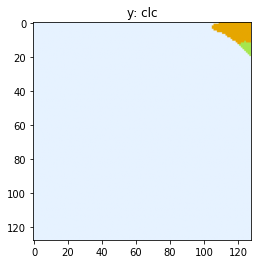

(10, 5515, 2500)
(128, 128, 3)


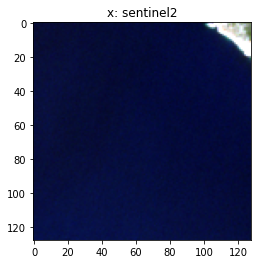

[1386, 1329, 1318, 1019, 1175, 560]
(10, 5515, 2500)
{'train': 5458, 'val': 1329}
torch.Size([4, 10, 128, 128]) torch.Size([4, 32, 128, 128])
-1.1428823922621814 3.212957725245923 1.0941053812266455 1.0504578598071528
0.0 1.0 0.03125 0.17399263633843817
cuda:0
Epoch 0/39
----------
LR 0.0005


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


train: bce: 0.149974, dice: 0.180229, loss: 0.165101
val: bce: 0.170867, dice: 0.148903, loss: 0.159885
saving best model
5m 21s
Epoch 1/39
----------
LR 0.0005
train: bce: 0.138042, dice: 0.149608, loss: 0.143825
val: bce: 0.176781, dice: 0.150740, loss: 0.163761
5m 37s
Epoch 2/39
----------
LR 0.0005
train: bce: 0.132798, dice: 0.147702, loss: 0.140250
val: bce: 0.160711, dice: 0.149712, loss: 0.155211
saving best model
5m 30s
Epoch 3/39
----------
LR 0.0005
train: bce: 0.127610, dice: 0.145751, loss: 0.136681
val: bce: 0.147503, dice: 0.154782, loss: 0.151143
saving best model
5m 27s
Epoch 4/39
----------
LR 0.0005
train: bce: 0.123857, dice: 0.143774, loss: 0.133815
val: bce: 0.162765, dice: 0.149916, loss: 0.156340
5m 27s
Epoch 5/39
----------
LR 0.0005
train: bce: 0.122469, dice: 0.140077, loss: 0.131273
val: bce: 0.149515, dice: 0.141578, loss: 0.145547
saving best model
5m 26s
Epoch 6/39
----------
LR 0.0005
train: bce: 0.120982, dice: 0.138184, loss: 0.129583
val: bce: 0.16247

In [ ]:
training('2')

In [ ]:
# testing('2','best')

In [ ]:
# testing('2','last')

In [ ]:
training('3')

In [ ]:
# testing('3','best')

In [ ]:
# testing('3','last')

In [ ]:
training('4')

In [ ]:
# testing('4','best')

In [ ]:
# testing('4','last')

In [ ]:
training('5')

In [ ]:
# testing('5','best')

In [ ]:
# testing('5','last')

In [ ]:
training('6')

In [ ]:
# testing('6','best')

In [ ]:
# testing('6','last')